# Healthcare Lab (Generalized Linear Models-Count Data)

**Learning Objectives:**
  * Define and fit generalized linear models for count data
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:

import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import warnings

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.describe()

,Id,ClaimItem,StartDate,EndDate,RevenueCode,BirthDate,TotalExpenses
count,52563.000000,52563.000000,52563,52563,52563.000000,52563,52563.000000
mean,685655.197953,12.023990,2020-06-21 00:12:27.902516992,2020-06-24 21:03:58.958963200,386.321995,1948-05-11 14:05:37.378003712,2735.230373
min,634363.000000,1.000000,2020-01-01 00:00:00,2020-01-01 00:00:00,24.000000,1921-01-18 00:00:00,0.000000
25%,658574.500000,5.000000,2020-03-09 00:00:00,2020-03-13 00:00:00,301.000000,1939-11-10 00:00:00,194.642000
50%,684404.000000,10.000000,2020-06-22 00:00:00,2020-06-26 00:00:00,307.000000,1947-05-12 00:00:00,675.262000
75%,712375.500000,16.000000,2020-09-25 00:00:00,2020-09-29 00:00:00,450.000000,1953-12-02 00:00:00,2309.265000
max,741736.000000,127.000000,2020-12-31 00:00:00,2020-12-31 00:00:00,942.000000,1999-08-09 00:00:00,504533.400000
std,30913.839360,10.747558,NaN,NaN,158.551733,NaN,8292.178928


In [6]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

In [7]:
HealthCareDataSet['AgeAtMedicalEvent']=(HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate'])

In [8]:
HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

,AgeAtMedicalEvent
0,52.657084
1,52.657084
2,52.657084
3,52.657084
4,52.657084
...,...
52558,80.637919
52559,70.258727
52560,70.258727
52561,70.258727


In [9]:
HealthCareDataSet['AgeAtMedicalEvent']=HealthCareDataSet['AgeAtMedicalEvent'].dt.total_seconds() / (365.25 * 24 * 60 * 60)

In [10]:
## We need to compute the duration of each Medical Treatment
HealthCareDataSet['MedicalTreatmentDuration']=(HealthCareDataSet['EndDate']-HealthCareDataSet['StartDate']).dt.days

In [11]:
HealthCareDataSet.groupby('County').count()

,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
County,,,,,,,,,,,,,,,,,,
02af982d,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
217dc01f,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
33b7d74d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39825de7,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
425a37b2,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
5597ffc0,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
6f0b5b6c,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555
6f943458,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
7a56b047,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [12]:
## Let's compute the top 3 Medical Conditions by Total Expenses

HealthCareDataSet.groupby('PrincipalDiagnosisDesc').agg({'TotalExpenses':'sum'}).sort_values(by='TotalExpenses',ascending=False).head(10)



,TotalExpenses
PrincipalDiagnosisDesc,
Sepsis unspecified organi,1.013163e+07
Non-ST elevation (NSTEMI),6.036035e+06
Atherosclerotic heart dis,5.258583e+06
Hypertensive heart and ch,3.996002e+06
Type 2 diabetes mellitus,3.492961e+06
Cerebral infarction due t,3.309356e+06
Hypertensive heart diseas,3.044502e+06
COVID-19,2.930786e+06
Acute kidney failure unsp,2.822044e+06


## 3. Analysis objective: Does the number of top Medical Conditions depend on the county?
### We want to explore the relationship betwen the number of medical conditions

We will fit a count model (Poisson Model).

Given the difference in number of medical events we only consider counties with a number of medical events larger than 1500.

We need to control for the size of each county this means we need a total count of medical event.

In [13]:
HealthCareDataSet.groupby('County').count()

,Id,MemberName,MemberID,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration
County,,,,,,,,,,,,,,,,,,
02af982d,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525,23525
217dc01f,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
33b7d74d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
39825de7,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
425a37b2,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468,9468
5597ffc0,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443
6f0b5b6c,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555,555
6f943458,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
7a56b047,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [14]:
# prompt: select counties with number of observations larger than 1500

county_counts = HealthCareDataSet.groupby('County')['MedicalClaim'].count()
selected_counties = county_counts[county_counts > 1500].index.tolist()
selected_counties


['02af982d',
 '425a37b2',
 '6f943458',
 '89e38653',
 'b021dd12',
 'e6708950',
 'fd218584']

In [15]:


largeCountiesFilter=HealthCareDataSet['County'].isin(selected_counties)


In [16]:
LargeCountiesDataFrame=HealthCareDataSet[largeCountiesFilter]
del HealthCareDataSet

In [17]:
top3Conditions=LargeCountiesDataFrame.groupby('PrincipalDiagnosisDesc').agg({'TotalExpenses':'sum'}).sort_values(by='TotalExpenses',ascending=False).head(3)
top3Conditions.index

Index(['Sepsis unspecified organi', 'Non-ST elevation (NSTEMI)',
       'Atherosclerotic heart dis'],
      dtype='object', name='PrincipalDiagnosisDesc')

In [18]:
LargeCountiesDataFrame['Top3Condition']=0

In [19]:
LargeCountiesDataFrame['PrincipalDiagnosisDesc'].isin(top3Conditions.index)

,PrincipalDiagnosisDesc
0,False
1,False
2,False
3,False
4,False
...,...
52558,False
52559,False
52560,False
52561,False


In [20]:
LargeCountiesDataFrame.loc[LargeCountiesDataFrame['PrincipalDiagnosisDesc'].isin(top3Conditions.index),'Top3Condition']=1

In [21]:
LargeCountiesDataFrame.groupby(['County','Top3Condition']).count()

Id  MemberName  MemberID  MedicalClaim  ClaimItem  \
County   Top3Condition                                                         
02af982d 0              21678       21678     21678         21678      21678   
         1               1847        1847      1847          1847       1847   
425a37b2 0               8775        8775      8775          8775       8775   
         1                693         693       693           693        693   
6f943458 0               1733        1733      1733          1733       1733   
         1                116         116       116           116        116   
89e38653 0               3539        3539      3539          3539       3539   
         1                228         228       228           228        228   
b021dd12 0               2344        2344      2344          2344       2344   
         1                335         335       335           335        335   
e6708950 0               1378        1378      1378          1378       1378   
         1                235         235       235           235        235   
fd218584 0               4780        4780      4780          4780       4780   
         1                569         569       569           569        569   

                        HospitalName  HospitalType  StartDate  EndDate  \
County   Top3Condition                                                   
02af982d 0                     21678         21678      21678    21678   
         1                      1847          1847       1847     1847   
425a37b2 0                      8775          8775       8775     8775   
         1                       693           693        693      693   
6f943458 0                      1733          1733       1733     1733   
         1                       116           116        116      116   
89e38653 0                      3539          3539       3539     3539   
         1                       228           228        228      228   
b021dd12 0                      2344          2344       2344     2344   
         1                       335           335        335      335   
e6708950 0                      1378          1378       1378     1378   
         1                       235           235        235      235   
fd218584 0                      4780          4780       4780     4780   
         1                       569           569        569      569   

                        PrincipalDiagnosisDesc  PrincipalDiagnosis  \
County   Top3Condition                                               
02af982d 0                               21678               21678   
         1                                1847                1847   
425a37b2 0                                8775                8775   
         1                                 693                 693   
6f943458 0                                1733                1733   
         1                                 116                 116   
89e38653 0                                3539                3539   
         1                                 228                 228   
b021dd12 0                                2344                2344   
         1                                 335                 335   
e6708950 0                                1378                1378   
         1                                 235                 235   
fd218584 0                                4780                4780   
         1                                 569                 569   

                        RevenueCodeDesc  RevenueCode  TypeFlag  BirthDate  \
County   Top3Condition                                                      
02af982d 0                        21678        21678     21678      21678   
         1                         1847         1847      1847       1847   
425a37b2 0                         8775         8775      8775       8775   
         1                          693          693   

## 4. Data Transformation
We need to create groups of patients based on age. This is informally called binning.
We also need to 'count' the number of occurrences of the event of interest (top3 medical condition) accross counties and age groups

In [22]:
## We create three categories of patients based on age, first we explore the distribution of AgeAtMedicalEvent

LargeCountiesDataFrame['AgeAtMedicalEvent'].describe()


,AgeAtMedicalEvent
count,48250.000000
mean,72.017095
std,12.068226
min,20.506502
25%,66.518823
50%,73.002053
75%,80.585900
max,99.709788


In [23]:
# prompt: split the column AgeAtMedicalEvent in three groups. [0-50],[50-75],[75-100]

bins = [0, 50, 75, 100]
labels = ['0-65', '65-75', '75-100']
LargeCountiesDataFrame['AgeGroup'] = pd.cut(LargeCountiesDataFrame['AgeAtMedicalEvent'], bins=bins, labels=labels, include_lowest=True)


In [24]:
LargeCountiesDataFrame.groupby('AgeGroup').count()

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,Top3Condition
AgeGroup,,,,,,,,,,,,,,,,,,,,
0-65,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957,2957
65-75,24474,24474,24474,24474,24474,24474,24474,24474,24474,24474,24474,24474,24472,24474,24474,24474,24474,24474,24474,24474
75-100,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819,20819


In [25]:
LargeCountiesDataFrame.head(5)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,...,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeAtMedicalEvent,MedicalTreatmentDuration,Top3Condition,AgeGroup
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148,52.657084,0,0,65-75
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073,52.657084,0,0,65-75
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900,52.657084,0,0,65-75
3,634388,e659f3f4,6a380a28,6f943458,c1e3436737c77899,20,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,7.511,52.657084,0,0,65-75
4,634389,e659f3f4,6a380a28,6f943458,c1e3436737c77899,19,04b77561,HOSPITAL,2020-01-08,2020-01-08,...,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,8.631,52.657084,0,0,65-75


In [26]:
LargeCountiesDataFrame[['County','AgeGroup','Top3Condition']].groupby(['County','AgeGroup']).agg(

  MedicalEventsCounts=('Top3Condition','count'),
  Top3ConditionCounts=('Top3Condition','sum'),



)




MedicalEventsCounts  Top3ConditionCounts
County   AgeGroup                                          
02af982d 0-65                      905                   89
         65-75                   11874                  870
         75-100                  10746                  888
425a37b2 0-65                      360                   11
         65-75                    4748                  296
         75-100                   4360                  386
6f943458 0-65                       63                    0
         65-75                     793                   96
         75-100                    993                   20
89e38653 0-65                      291                    0
         65-75                    2005                  147
         75-100                   1471                   81
b021dd12 0-65                      635                   18
         65-75                     994                  127
         75-100                   1050                  190
e6708950 0-65                      233                   67
         65-75                     949                  154
         75-100                    431                   14
fd218584 0-65                      470                    0
         65-75                    3111                  362
         75-100                   1768                  207

In [27]:
DataReady=LargeCountiesDataFrame[['County','AgeGroup','Top3Condition']].groupby(['County','AgeGroup']).agg(

  MedicalEventsCounts=('Top3Condition','count'),
  Top3ConditionCounts=('Top3Condition','sum'),).reset_index()
DataReady

,County,AgeGroup,MedicalEventsCounts,Top3ConditionCounts
0,02af982d,0-65,905,89
1,02af982d,65-75,11874,870
2,02af982d,75-100,10746,888
3,425a37b2,0-65,360,11
4,425a37b2,65-75,4748,296
5,425a37b2,75-100,4360,386
6,6f943458,0-65,63,0
7,6f943458,65-75,793,96
8,6f943458,75-100,993,20
9,89e38653,0-65,291,0


## 5. Data Exploration

<Axes: xlabel='Top3ConditionCounts', ylabel='Count'>

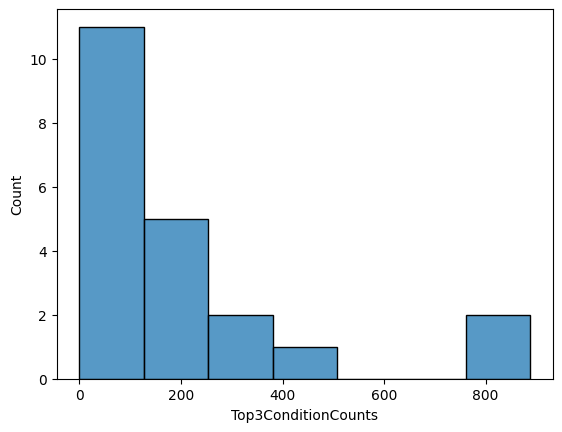

In [28]:
import seaborn as sns
sns.histplot(DataReady,x='Top3ConditionCounts')

In [29]:
qualitativeFactorstoExplore=['County', 'AgeGroup']

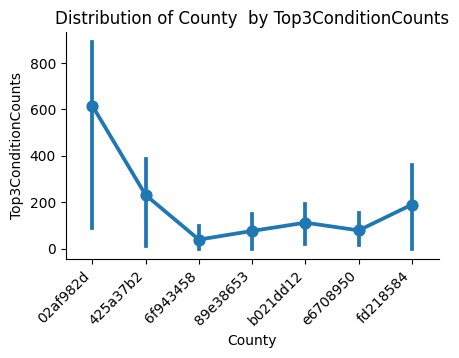

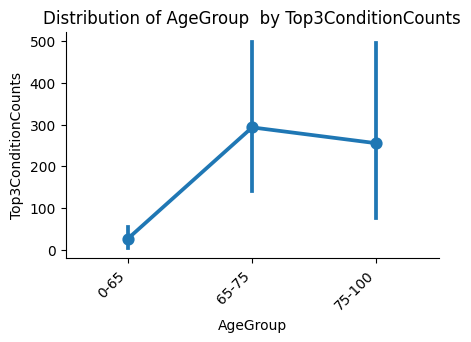

In [30]:
for factor in qualitativeFactorstoExplore:

  sns.catplot(data=DataReady, x=factor, y="Top3ConditionCounts", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by Top3ConditionCounts')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
  plt.show()

## 6. First model


#### We will assume that the random variable approve follows a poisson distribution with parameter $\mu$
$Y_i\sim Poisson(\mu)$


#### We assume a log function, this means that we are assuming that the log odds of the mean can be modeled as a linear combination of the factors under consideration.

$ log(\mu)=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $


In [31]:
DataReady.head(10)

,County,AgeGroup,MedicalEventsCounts,Top3ConditionCounts
0,02af982d,0-65,905,89
1,02af982d,65-75,11874,870
2,02af982d,75-100,10746,888
3,425a37b2,0-65,360,11
4,425a37b2,65-75,4748,296
5,425a37b2,75-100,4360,386
6,6f943458,0-65,63,0
7,6f943458,65-75,793,96
8,6f943458,75-100,993,20
9,89e38653,0-65,291,0


In [32]:
import statsmodels.formula.api as smf
import numpy as np


# defining the poisson glm
poisson_glm = smf.glm(formula = 'Top3ConditionCounts ~ County + AgeGroup+MedicalEventsCounts',
                      data = DataReady,
                      family = sm.families.Poisson())

# fitting the model
results = poisson_glm.fit()

# Printing the summary of the regression results
print(results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Top3ConditionCounts   No. Observations:                   21
Model:                             GLM   Df Residuals:                       11
Model Family:                  Poisson   Df Model:                            9
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -313.63
Date:                 Mon, 07 Oct 2024   Deviance:                       509.00
Time:                         14:16:16   Pearson chi2:                     532.
No. Iterations:                      6   Pseudo R-squ. (CS):              1.000
Covariance Type:             nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               

## 7. Model interpretation:


All coefficients are statistically significant except 'MedicalEventsCounts'.

We observe large differences accross counties in terms of counts of the top3 Medical Events ('Sepsis unspecified organi', 'Non-ST elevation (NSTEMI)' 'Atherosclerotic heart dis').

As expected Older patients experience larger rates of the top3 Medical Events.

Patients in the 65-75 age group experience larger number of top3 medical events than those in the 0-65 age group (reference category): $e^{2.21}=9.11$ (aprox. 900%).

Patients in the 75-100 age group experience lower number of top3 medical events than their 65-75 counterparts $e^{(2.1-2.21)}=0.9$ (aprox. 10% )

## 8. Analysis

In [34]:
# Calculating the dispersion statistic
# 1. Pearson chi-squared statistic
pearson_chi2 = np.sum((results.resid_pearson)**2)
# 2. Degrees of freedom
degrees_of_freedom = DataReady.shape[0] - results.df_model - 1
# 3. Dispersion statistic (phi)
dispersion_stat = pearson_chi2 / degrees_of_freedom

print(f'Dispersion Statistic: {dispersion_stat}')

# Interpretation
if dispersion_stat > 1:
    print('Evidence of overdispersion.')
else:
    print('No significant overdispersion detected.')

Dispersion Statistic: 48.32574656206316
Evidence of overdispersion.


## 9. Negative Binomial model

#### We found evidence of overdispersion. In this situation we can use negative binomial models.

#### We will assume that the random variable approve follows a negative Binomial distribution with parameter $\mu$
$Y_i\sim NegBin(\mu)$


#### We assume a log function, this means that we are assuming that the log odds of the mean can be modeled as a linear combination of the factors under consideration.

$ log(\mu)=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $

In [36]:
# defining the poisson glm
negative_glm = smf.glm(formula = 'Top3ConditionCounts ~ County + AgeGroup+MedicalEventsCounts',
                      data = DataReady,
                      family = sm.families.NegativeBinomial())

# fitting the model
results = negative_glm.fit()

# Printing the summary of the regression results
print(results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     Top3ConditionCounts   No. Observations:                   21
Model:                             GLM   Df Residuals:                       11
Model Family:         NegativeBinomial   Df Model:                            9
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -113.41
Date:                 Mon, 07 Oct 2024   Deviance:                       20.214
Time:                         14:33:08   Pearson chi2:                     10.2
No. Iterations:                     30   Pseudo R-squ. (CS):             0.8201
Covariance Type:             nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               